In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [219]:
import kaggle_cli

In [223]:
kaggle_cli.__path__

['C:\\Users\\Bestz\\Anaconda3\\lib\\site-packages\\kaggle_cli']

In [1]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [2]:
get_sample

<function fastai.structured.get_sample>

In [3]:
df = pd.read_csv("train.csv", index_col=0)

In [213]:
df3 = pd.read_csv("train.csv", index_col=0)

In [4]:
df.head()

,bone_length,rotting_flesh,hair_length,has_soul,color,type
id,,,,,,
0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [5]:
df.describe()

,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000
mean,0.434160,0.506848,0.529114,0.471392
std,0.132833,0.146358,0.169902,0.176129
min,0.061032,0.095687,0.134600,0.009402
25%,0.340006,0.414812,0.407428,0.348002
50%,0.434891,0.501552,0.538642,0.466372
75%,0.517223,0.603977,0.647244,0.600610
max,0.817001,0.932466,1.000000,0.935721


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 897
Data columns (total 6 columns):
bone_length      371 non-null float64
rotting_flesh    371 non-null float64
hair_length      371 non-null float64
has_soul         371 non-null float64
color            371 non-null object
type             371 non-null object
dtypes: float64(4), object(2)
memory usage: 20.3+ KB


In [7]:
def convert_cat(df, col):
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 8 columns):
id               371 non-null int64
bone_length      371 non-null float64
rotting_flesh    371 non-null float64
hair_length      371 non-null float64
has_soul         371 non-null float64
color            371 non-null int8
type             371 non-null int8
filter           371 non-null float64
dtypes: float64(5), int64(1), int8(2)
memory usage: 18.2 KB


In [214]:
vbvb = df3.type.astype('category')

In [215]:
vbvb.cat.categories

Index(['Ghost', 'Ghoul', 'Goblin'], dtype='object')

In [8]:
convert_cat(df, "color")

In [9]:
convert_cat(df, "type")

In [9]:
color = ['color']

In [12]:
df = pd.get_dummies(data = df, columns = ['color'])

In [10]:
df.head()

,bone_length,rotting_flesh,hair_length,has_soul,color,type
id,,,,,,
0,0.354512,0.350839,0.465761,0.781142,3,1
1,0.575560,0.425868,0.531401,0.439899,4,2
2,0.467875,0.354330,0.811616,0.791225,0,1
4,0.776652,0.508723,0.636766,0.884464,0,1
5,0.566117,0.875862,0.418594,0.636438,4,0


In [11]:
df.shape

(371, 6)

In [40]:
chosen_idx = np.random.choice(371, replace=False, size=51)
df_trimmed = df.iloc[chosen_idx]

In [41]:
df_trimmed.shape

(51, 8)

In [14]:
a = np.zeros(len(df))

In [15]:
for i in range(1,len(df)):
    if i in chosen_idx:
        a[i] = False
    else:
        a[i] = True

In [16]:
a.reshape(371,1)
df.shape

(371, 6)

In [17]:
df.reset_index(inplace=True)

In [18]:
df.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,3,1
1,1,0.575560,0.425868,0.531401,0.439899,4,2
2,2,0.467875,0.354330,0.811616,0.791225,0,1
3,4,0.776652,0.508723,0.636766,0.884464,0,1
4,5,0.566117,0.875862,0.418594,0.636438,4,0


In [19]:
df['filter'] = a

In [20]:
df.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type,filter
0,0,0.354512,0.350839,0.465761,0.781142,3,1,0.0
1,1,0.575560,0.425868,0.531401,0.439899,4,2,1.0
2,2,0.467875,0.354330,0.811616,0.791225,0,1,1.0
3,4,0.776652,0.508723,0.636766,0.884464,0,1,1.0
4,5,0.566117,0.875862,0.418594,0.636438,4,0,1.0


In [21]:
df.to_feather('Preprocessed_Train')

In [22]:
df = pd.read_feather("Preprocessed_Train")

In [42]:
Train = df[df['filter'] == 1]
Test = df_trimmed

In [43]:
Train.shape

(320, 8)

In [44]:
Test.shape

(51, 8)

In [45]:
Test.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type,filter
41,86,0.456935,0.627141,0.463794,0.436216,0,0,1.0
301,722,0.577809,0.500339,0.756629,0.854949,5,2,0.0
75,170,0.480836,0.407930,0.539005,0.495069,3,2,1.0
354,847,0.356999,0.671331,0.296784,0.689980,0,0,1.0
269,662,0.403727,0.364366,0.609004,0.487301,5,2,1.0


In [46]:
x_test = Test.drop(['id', 'type', 'filter'], axis = 1)
y_test = Test.type

In [47]:
x = Train.drop(['id', 'type', 'filter'], axis = 1)
y = Train.type

In [49]:
print(x.shape);
print(y.shape);
print(x_test.shape)
print(y_test.shape)

(320, 5)
(320,)
(51, 5)
(51,)


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [80]:
classifier = RandomForestClassifier(n_estimators=200, min_samples_leaf=10, max_features='auto', oob_score=True)

In [81]:
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [82]:
print('Training score: ', classifier.score(x_train, y_train))
print('Validation score: ', classifier.score(x_val, y_val))
print('Testing score: ', metrics.accuracy_score(y_test, classifier.predict(x_test)))
#print('OOB score: ', classifier.oob_score_())

Training score:  0.83984375
Validation score:  0.765625
Testing score:  0.7647058823529411


In [83]:
imp = classifier.feature_importances_
cols = x_train.columns

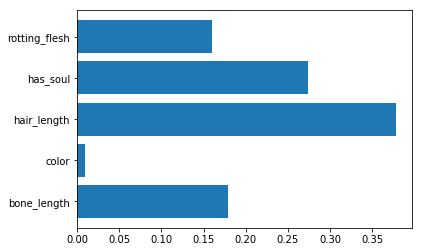

In [84]:
plt.barh(cols, imp)
plt.show()

In [86]:
x_train.drop('color',axis=1,inplace=True)
x_val.drop('color',axis=1,inplace=True)
x_test.drop('color',axis=1,inplace=True)

C:\Users\Bestz\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [87]:
classifier = RandomForestClassifier(n_estimators=200, min_samples_leaf=10, max_features='auto', oob_score=True)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [89]:
print('Training score: ', classifier.score(x_train, y_train))
print('Validation score: ', classifier.score(x_val, y_val))
print('Testing score: ', metrics.accuracy_score(y_test, classifier.predict(x_test)))
#print('OOB score: ', classifier.oob_score_()

Training score:  0.83203125
Validation score:  0.78125
Testing score:  0.7843137254901961


In [90]:
fim = pd.DataFrame({'cols':x_train.columns, 'imp':classifier.feature_importances_})
fim

,cols,imp
0,bone_length,0.159056
1,rotting_flesh,0.151521
2,hair_length,0.413576
3,has_soul,0.275848


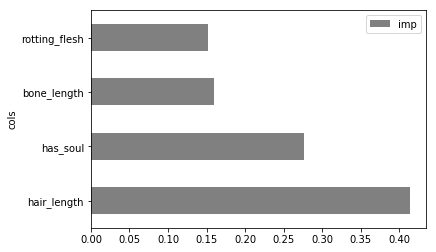

In [91]:
fim.sort_values('imp',ascending=False).plot('cols','imp','barh', color='gray')
plt.show()

From this chart, we can conclude that 'hair_length' is the most important variable for the model.

In [93]:
metrics.confusion_matrix(y_test, classifier.predict(x_test))

array([[17,  1,  1],
       [ 2, 11,  3],
       [ 2,  2, 12]], dtype=int64)

In [95]:
print(metrics.accuracy_score(y_test, classifier.predict(x_test)))

0.7843137254901961


In [96]:
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence

In [97]:
from pdpbox import pdp
from plotnine import *

In [98]:
p = pdp.pdp_isolate(classifier, x_train, 'has_soul')

In [100]:
df[df.has_soul == max(df.has_soul)]

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type,filter
11,23,0.584543,0.593082,0.681166,0.935721,3,1,1.0


In [102]:
df[df.has_soul == min(x_train.has_soul)]

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type,filter
82,185,0.516814,0.463708,0.321867,0.009402,4,0,1.0


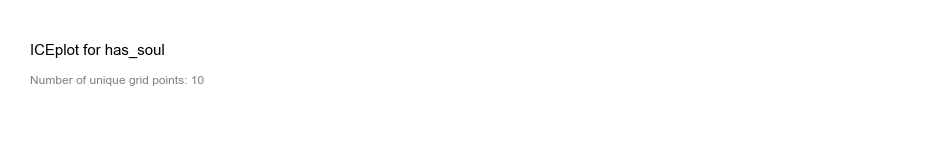

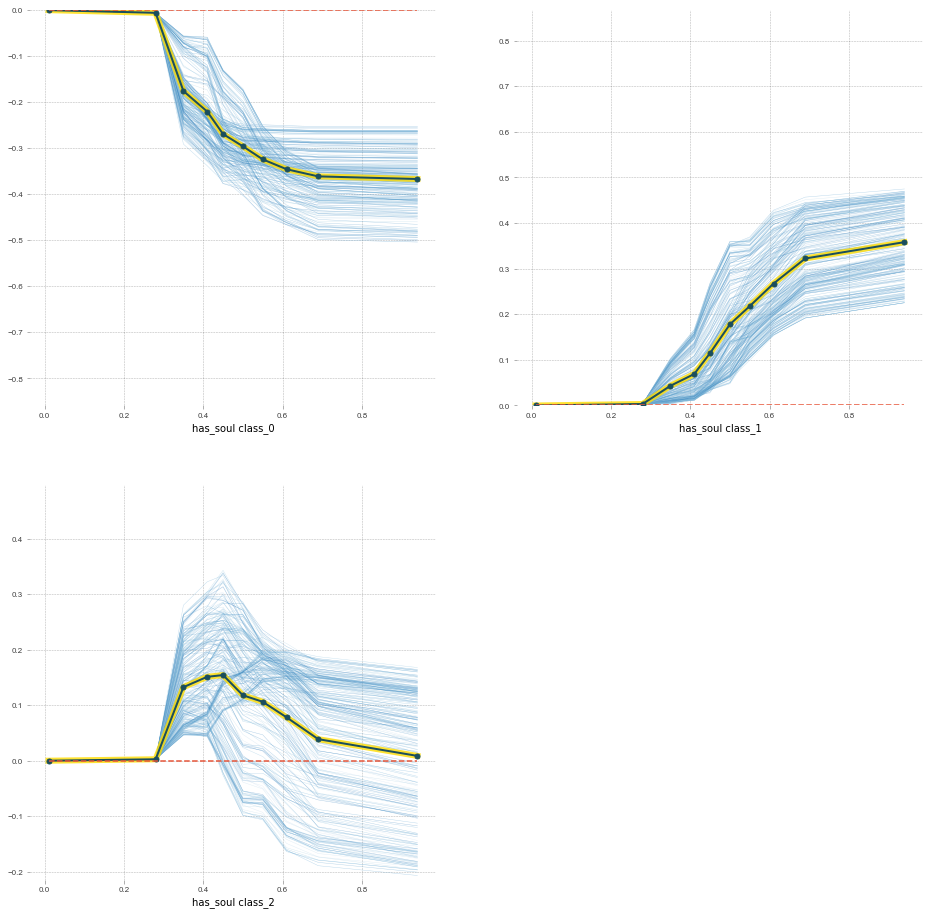

In [99]:
p = pdp.pdp_isolate(classifier, x_train, 'has_soul')
pdp.pdp_plot(p, 'has_soul', plot_lines=True)
plt.show()

Random Forest capture pattern about variable 'has_soul' as the following detail
- Has_soul has negative relationship with Class 0 or Ghost
- Has_soul has positive relationship with Class 1 or Ghoul
- Has_soul has unclear relationship with Class 3 or Goblin

In [167]:
from treeinterpreter import treeinterpreter as ti

In [165]:
row = x_val.values[None,0]; row

array([[0.36742, 0.57523, 0.47494, 0.4484 ]])

In [168]:
prediction , bias, contributions = ti.predict(classifier, row)

In [169]:
prediction[0], bias[0]

(array([0.56432, 0.14865, 0.28703]), array([0.31516, 0.34839, 0.33646]))

In [170]:
idxs = np.argsort(contributions[0])

In [172]:
[o for o in zip(x_val.columns[idxs], x_val.iloc[0][idxs], contributions[0][idxs])]

[(['rotting_flesh', 'bone_length', 'hair_length'],
  array([0.57523, 0.36742, 0.47494]),
  array([[ 0.10309,  0.0335 , -0.13659],
         [ 0.03638, -0.08406,  0.04768],
         [ 0.11371, -0.12672,  0.01301]])),
 (['hair_length', 'rotting_flesh', 'bone_length'],
  array([0.47494, 0.57523, 0.36742]),
  array([[ 0.11371, -0.12672,  0.01301],
         [ 0.10309,  0.0335 , -0.13659],
         [ 0.03638, -0.08406,  0.04768]])),
 (['rotting_flesh', 'hair_length', 'bone_length'],
  array([0.57523, 0.47494, 0.36742]),
  array([[ 0.10309,  0.0335 , -0.13659],
         [ 0.11371, -0.12672,  0.01301],
         [ 0.03638, -0.08406,  0.04768]])),
 (['rotting_flesh', 'bone_length', 'hair_length'],
  array([0.57523, 0.36742, 0.47494]),
  array([[ 0.10309,  0.0335 , -0.13659],
         [ 0.03638, -0.08406,  0.04768],
         [ 0.11371, -0.12672,  0.01301]]))]

Result looks really confusing

# Let's try Neural Network model and its interpretations

In [103]:
from sklearn.neural_network import MLPClassifier

In [172]:
net = MLPClassifier(hidden_layer_sizes=(100,10), random_state=1)

In [185]:
y_train2 = y_train[:,None]

In [192]:
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train).
x_val2 =  sc.transform(x_val)
x_test2 = sc.transform(x_test)

In [200]:
x_train2 = pd.DataFrame(x_train2, columns=x_train.columns)
x_val2 = pd.DataFrame(x_val2, columns=x_train.columns)
x_test2 = pd.DataFrame(x_test2, columns=x_train.columns)

In [201]:
net.fit(x_train2, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [202]:
print('Training score: ', net.score(x_train2, y_train))
print('Validation score: ', net.score(x_val2, y_val))
print('Testing score: ', net.score(x_test2, y_test))
#print('OOB score: ', classifier.oob_score_()

Training score:  0.78125
Validation score:  0.78125
Testing score:  0.8235294117647058


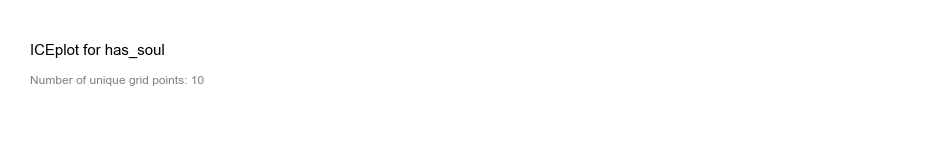

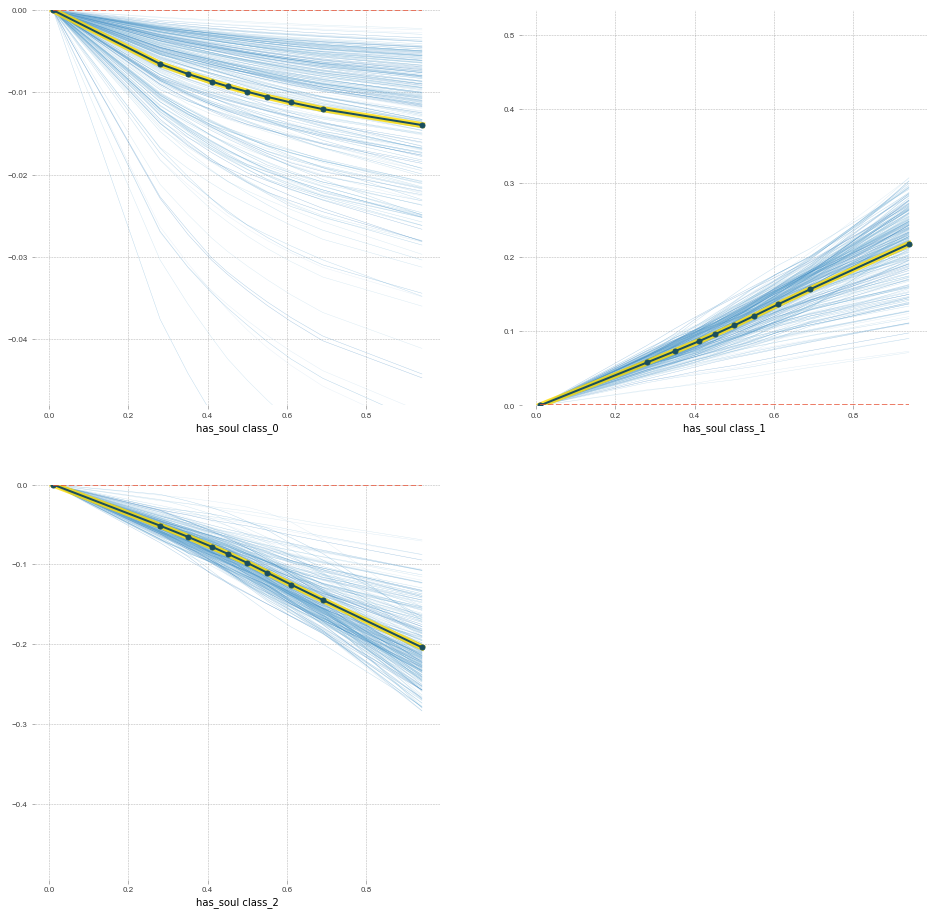

In [195]:
p = pdp.pdp_isolate(net, x_train, 'has_soul')
pdp.pdp_plot(p, 'has_soul', plot_lines=True)
plt.show()

## Try to find feature importance using Neural Network

Feature importance = Different in R-square of model between base model and model that particular column destroyed
    Since the dataset have only 4 columns, i then use for-loop to randomly shuffle data in particular column for each round of the loop. Then calculate score(r-square) of model with each column destroyed. 

In [119]:
import random

In [203]:
cols = x_train.columns
scoresss = []
for i in cols:
    xx = x_train2.copy()
    abab = xx[i].values.copy()
    random.shuffle(abab)
    xx.drop(i,axis=1,inplace=True)
    xx[f'{i}'] = abab
    net = MLPClassifier(hidden_layer_sizes=(100,10), random_state=1)
    net.fit(xx, y_train)
    sco = net.score(xx, y_train)
    tes = net.score(x_test2, y_test)
    scoresss.append(sco)
    print(f'{i}', sco)
    print(f'{i}_test', tes)

bone_length 0.77734375
bone_length_test 0.39215686274509803
rotting_flesh 0.76171875
rotting_flesh_test 0.6274509803921569
hair_length 0.7421875
hair_length_test 0.7843137254901961
has_soul 0.78125
has_soul_test 0.7843137254901961


The result is not so impressive. The result quite different from Random Forest result.
This may be due to too few data.